In [8]:
import numpy as np
import matplotlib.pyplot as plt

from draw_radar import read_cwb_radar_sweep
from pyart.graph import RadarMapDisplayBasemap
from pyart.map import grid_from_radars

In [9]:
GRID_RANGE = 200000  # 單位為公尺

In [10]:
radar_data_path = 'data/RCWF.20211231.2351.cref.00.gz'

# 讀取雷達資料 type: pyart.core.radar.Radar
radar = read_cwb_radar_sweep(radar_data_path)

grid_kwargs = {
    'grid_shape': (1, 512, 512),  # 只需要一層的z方向
    'grid_limits': ((0, 0),      # z方向範圍較小
                    (-GRID_RANGE, GRID_RANGE),  # y方向範圍
                    (-GRID_RANGE, GRID_RANGE)),  # x方向範圍
    'gridding_algo': 'map_gates_to_grid',  # 較快
    # gridding_algo='map_to_grid', # 較慢
}

# 將雷達資料轉換為格網資料(插值)
grid = grid_from_radars(radar, **grid_kwargs)

grid_data = grid.fields['composite_reflectivity']['data'][0]
grid_data_reversed = np.flipud(grid_data) # 將格網資料上下翻轉(發現會友上下顛倒的問題，所以這邊做反轉)
grid_dbz = grid_data_reversed.data

grid_dbz[grid_dbz < -20] = -20 # 將反射率小於-20dBZ的值設為-20dBZ
grid_dbz[grid_dbz > 65] = 65 # 將反射率大於65dBZ的值設為65dBZ

unzip files
header: (b'RCWFRCWFRCWFRCWF', 100, 76600, 2507, 12177, 202100, 1200, 3100, 2300, 5100, 3700, 842, 21500, 100, 0, 36000, 46000, 0, 100, 212500, 100000, 1000, -9900, 0, 0, 0, 0, 0, 0, 1178948163, 0, 0, 0, 0, 5915236, 1113849856, 90)
rlat: 25.07
rlon: 121.77
data_shape: (360, 460)


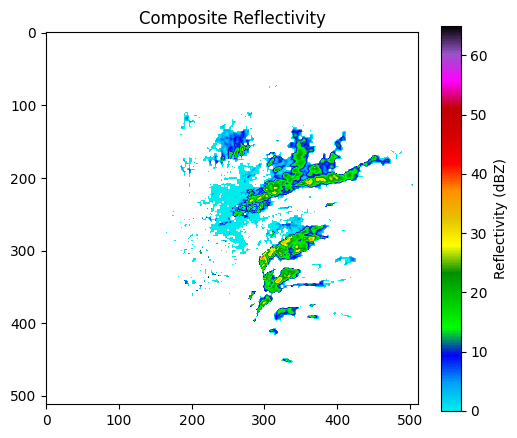

In [13]:
plt.figure(figsize=(6, 5))
# 清除過小的雷達迴波值
masked_data = np.ma.masked_where(grid_data_reversed <= -20, grid_data_reversed)
plt.imshow(masked_data,
           cmap='pyart_NWSRef', 
           vmin=0, vmax=65)

plt.colorbar(label='Reflectivity (dBZ)')
plt.title('Composite Reflectivity')
plt.show()